In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.optimize
from scipy.optimize import linprog
%matplotlib inline  

Example of linear programming with  linprog 

In [11]:
c = [-2, -1]
A = [[1, 6], [2, 2], [4,1]]
b = [30,15,24]
x0_bounds = (0., None)
bounds=2*[x0_bounds]
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds)


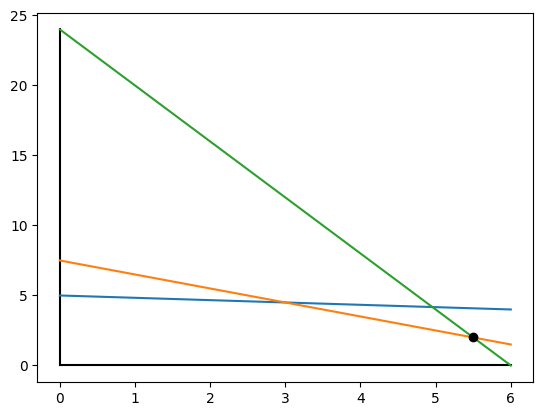

In [12]:

plt.plot([0,6],[0,0],'k')
plt.plot([0,0],[0,24],'k')
x=[0,6.]
y=[0,0.]
for i in range(3):
    for j in range(2):
        y[j]=(b[i]-A[i][0]*x[j])/A[i][1]
    plt.plot(x,y)
plt.plot(res.x[0],res.x[1],'ok')    
    

### Logistics problem: optimization of deliveries from warehouses to stores 

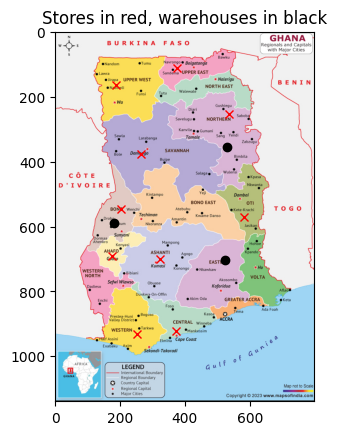

In [13]:
from PIL import Image
import matplotlib.pyplot as plt

# Charger l'image
image_path = '../FIGURES/ghana.jpg'
image = Image.open(image_path)

stores=[ (371.7646103896103, 920.623106060606), (251.57792207792204, 931.409090909091), (322.457251082251, 700.2808441558442), (174.53517316017314, 691.0357142857143), (202.27056277056272, 546.1953463203463), (265.4456168831168, 376.7012987012987), (536.636093073593, 253.4329004329004), (186.86201298701292, 164.06331168831161), (374.84632034632034, 111.67424242424227), (581.3208874458874, 569.3081709956709)]
warehouses=[(530.4726731601731, 355.12932900432895), (182.239448051948, 587.7984307359308), (522.7683982683982, 703.3625541125541)]
# Afficher l'image
plt.imshow(image)
plt.title("Stores in red, warehouses in black")
for s in stores:
    plt.plot(s[0],s[1],'rx')
for w in warehouses:
    plt.plot(w[0],w[1],'ok')
plt.savefig("ghana_map.png")
plt.show()

In [14]:
xe =[w[0] for w in warehouses]
ye =[w[1] for w in warehouses]

xu =[s[0] for s in stores]
yu =[s[1] for s in stores]
M=len(xe)
N=len(xu)

In [15]:
import random
# all arrays are reshaoped in columns
C=[]
for j in range(N):
    C_j=[]
    for i in range(M):
        C_j.append(((xe[i]-xu[j])**2+(ye[i]-yu[j])**2)**0.5)
    C=C+C_j
Aub=[]
for i in range(M):
    Aub_i=N*M*[0]
    for j in range(N):
        Aub_i[M*j+i]=1.
    Aub.append(Aub_i)
Aeq=[]
for j in range(N):
    Aeq_j=N*M*[0]
    for i in range(M):
        Aeq_j[M*j+i]=1.
    Aeq.append(Aeq_j)

Beq=random.sample(range(900), N)   # orders
stock=(sum(Beq)+100)/M;            
Bub=M*[stock];                     # warehouses all have same stock
tup=(0,None)
bounds=N*M*[tup]


In [16]:
x=linprog (C, A_ub=Aub, b_ub=Bub, A_eq=Aeq, b_eq=Beq,
		 bounds=bounds, method='interior-point', callback=None, options=None, x0=None)

/var/folders/v4/1mfw355n72v_md7y5wzlvp580000gn/T/ipykernel_79549/1787335526.py:1: DeprecationWarning: `method='interior-point'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  x=linprog (C, A_ub=Aub, b_ub=Bub, A_eq=Aeq, b_eq=Beq,


In [17]:
print(x)
for i in range(M):
    print('%1d th warehouse holds %4.0f and sends' %(i,Bub[i]))
    s=0.
    for j in range(N):
        if x.x[j*M+i]>5:
            print('    %3.0f' %x.x[j*M+i],' to',j+1,'th store')
            s=s+x.x[j*M+i]
    print('total %4.0f' %s)   


for j in range(N):
    print(j+1,'th store ordered ',Beq[j],' and receives')
    s=0.
    for i in range(M):
        if x.x[j*M+i]>5:
            print('    %3.0f' %x.x[j*M+i],' from',i+1,'th warehouse')
            s=s+x.x[j*M+i]
    print('total   %3.0f' %s)


 message: Optimization terminated successfully.
 success: True
  status: 0
     fun: 851113.7761354775
       x: [ 1.037e-10  3.206e-10 ...  1.436e-10  5.020e+02]
     nit: 8
0 th warehouse holds 1353 and sends
    713  to 7 th store
     60  to 8 th store
    580  to 9 th store
total 1353
1 th warehouse holds 1353 and sends
     69  to 2 th store
    104  to 3 th store
    347  to 4 th store
    110  to 5 th store
    387  to 6 th store
    336  to 8 th store
total 1353
2 th warehouse holds 1353 and sends
    739  to 1 th store
     12  to 2 th store
    502  to 10 th store
total 1253
1 th store ordered  739  and receives
    739  from 3 th warehouse
total   739
2 th store ordered  81  and receives
     69  from 2 th warehouse
     12  from 3 th warehouse
total    81
3 th store ordered  104  and receives
    104  from 2 th warehouse
total   104
4 th store ordered  347  and receives
    347  from 2 th warehouse
total   347
5 th store ordered  110  and receives
    110  from 2 th wareho

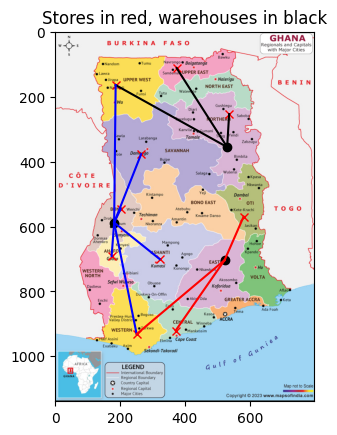

In [18]:
colors=['k','b','r','o','m','g']
plt.imshow(image)
plt.title("Stores in red, warehouses in black")
for s in stores:
    plt.plot(s[0],s[1],'rx')
for w in warehouses:
    plt.plot(w[0],w[1],'ok')
for i in range(M):
    for j in range(N):
        if x.x[j*M+i]>10:
            plt.plot([xe[i],xu[j]],[ye[i],yu[j]],colors[i%6])
plt.savefig("ghana_del.png")
